# SCOPE of the code:
- Generate Visualization map for OCO-3

# Testing with OCO-3 DATASET
- PLotly- using SCATTER data points
- BASEMAP: ortho
    - rotating globe to show variations on data points

# BASEMAP Installation:
- Check the code from this same directory to SETUP the basemap LIBRARY
* Data_pre-processing_and_Basemap_Plotly

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd

import dask.dataframe as dd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

#BASEMAP
from mpl_toolkits.basemap import Basemap
import matplotlib

import seaborn as sns; sns.set()

import PIL as plw

In [5]:
import matplotlib.pyplot as plt

# OCO-3 Dataset for analysis

# DASK to read multiple CSV files for OCO-3

In [6]:
df_xco2= dd.read_csv("../../Clusters_DATA_oil/OCO-3/Lite_files/2019_2020_COMBINED_csv/*.csv",
                     parse_dates=["DateTime"])

In [7]:
df_xco2

Dask DataFrame Structure:
                    Xco2 Latitude Longitude quality_flag        DateTime   Year  Month    Day
npartitions=389                                                                              
                 float64  float64   float64        int64  datetime64[ns]  int64  int64  int64
                     ...      ...       ...          ...             ...    ...    ...    ...
...                  ...      ...       ...          ...             ...    ...    ...    ...
                     ...      ...       ...          ...             ...    ...    ...    ...
                     ...      ...       ...          ...             ...    ...    ...    ...
Dask Name: read-csv, 389 tasks

# Total RECORDS (rows)
- 47305183

In [8]:
%%time
# len(df_xco2.Xco2.compute())

Wall time: 0 ns


In [9]:
df_xco2.head(3)

Xco2   Latitude  Longitude  quality_flag                DateTime  \
0  410.98047 -24.961294  80.657340             0 2019-08-06 03:50:04.010   
1  410.51340 -24.936787  80.659360             0 2019-08-06 03:50:04.020   
2  410.67697 -24.911963  80.661316             0 2019-08-06 03:50:04.030   

   Year  Month  Day  
0  2019      8    6  
1  2019      8    6  
2  2019      8    6

In [10]:
df_xco2.tail(3)

Xco2   Latitude   Longitude  quality_flag  \
230662  409.74152 -50.486390 -110.823410             1   
230663  407.37634 -50.492046 -110.792404             1   
230664  403.56522 -50.497696 -110.761380             1   

                      DateTime  Year  Month  Day  
230662 2020-12-31 23:20:28.080  2020     12   31  
230663 2020-12-31 23:20:28.380  2020     12   31  
230664 2020-12-31 23:20:28.780  2020     12   31

# OCO-3 Release Date
## 4 May 2019
- Cluster Data for 2019 starts from August-DEC
- Incomplete datasets

# TOtal Months for 2019: OCO-3 Datasets
- Remaining months datastes missing from CLUSTER

# Filtering the XOC2 GOOD quality

In [11]:
%%time
df_xco2_good_quality= df_xco2[df_xco2['quality_flag'] == 0].compute()

Wall time: 3min 43s


In [12]:
df_xco2_good_quality.head()

Xco2   Latitude  Longitude  quality_flag                DateTime  \
0  410.98047 -24.961294  80.657340             0 2019-08-06 03:50:04.010   
1  410.51340 -24.936787  80.659360             0 2019-08-06 03:50:04.020   
2  410.67697 -24.911963  80.661316             0 2019-08-06 03:50:04.030   
3  411.39510 -24.887363  80.663180             0 2019-08-06 03:50:04.040   
4  411.14368 -24.862957  80.665050             0 2019-08-06 03:50:04.050   

   Year  Month  Day  
0  2019      8    6  
1  2019      8    6  
2  2019      8    6  
3  2019      8    6  
4  2019      8    6

In [13]:
len(df_xco2_good_quality)

16520069

In [14]:
df_xco2_good_quality.Month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  6,  7], dtype=int64)

# BOX plot of XCO2 by month

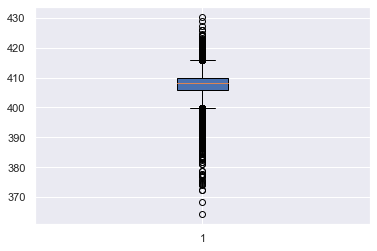

In [15]:
fig, ax= plt.subplots()
ax.boxplot(df_xco2_good_quality["Xco2"][df_xco2_good_quality["Month"]==8], patch_artist=True);


In [16]:
df_xco2_good_quality.describe()

Xco2      Latitude     Longitude  quality_flag          Year  \
count  1.652007e+07  1.652007e+07  1.652007e+07    16520069.0  1.652007e+07   
mean   4.102050e+02  1.124839e+01  1.652968e+01           0.0  2.019760e+03   
std    2.698907e+00  2.993145e+01  8.972349e+01           0.0  4.270821e-01   
min    3.636155e+02 -5.196842e+01 -1.800000e+02           0.0  2.019000e+03   
25%    4.086832e+02 -1.876237e+01 -5.623515e+01           0.0  2.020000e+03   
50%    4.102595e+02  1.920405e+01  2.718239e+01           0.0  2.020000e+03   
75%    4.118525e+02  3.820123e+01  8.285020e+01           0.0  2.020000e+03   
max    4.392911e+02  5.282764e+01  1.799999e+02           0.0  2.020000e+03   

              Month           Day  
count  1.652007e+07  1.652007e+07  
mean   7.451241e+00  1.562454e+01  
std    3.282764e+00  9.577674e+00  
min    1.000000e+00  1.000000e+00  
25%    6.000000e+00  7.000000e+00  
50%    8.000000e+00  1.500000e+01  
75%    1.000000e+01  2.500000e+01  
max    1.200000e+01  3.100000e+01

In [17]:
import seaborn as sns; sns.set()

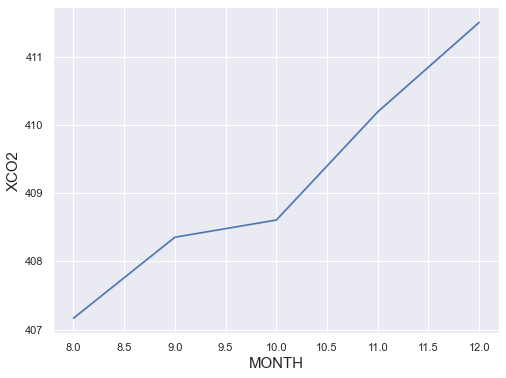

In [18]:
# sns.lineplot(x= df_xco2_good_quality["Month"], y= df_xco2_good_quality["Xco2"])
# plt.gcf().set_size_inches(8,6)
# plt.xlabel("MONTH", fontsize= 15)
# plt.ylabel("XCO2", fontsize= 15);
from IPython.display import Image
Image(filename= "boxplot_oco-3.png")

# MAX xco2

In [19]:
max(df_xco2_good_quality["Xco2"])

439.29108

# Meta DATA

In [20]:
df_xco2_good_quality.describe()

Xco2      Latitude     Longitude  quality_flag          Year  \
count  1.652007e+07  1.652007e+07  1.652007e+07    16520069.0  1.652007e+07   
mean   4.102050e+02  1.124839e+01  1.652968e+01           0.0  2.019760e+03   
std    2.698907e+00  2.993145e+01  8.972349e+01           0.0  4.270821e-01   
min    3.636155e+02 -5.196842e+01 -1.800000e+02           0.0  2.019000e+03   
25%    4.086832e+02 -1.876237e+01 -5.623515e+01           0.0  2.020000e+03   
50%    4.102595e+02  1.920405e+01  2.718239e+01           0.0  2.020000e+03   
75%    4.118525e+02  3.820123e+01  8.285020e+01           0.0  2.020000e+03   
max    4.392911e+02  5.282764e+01  1.799999e+02           0.0  2.020000e+03   

              Month           Day  
count  1.652007e+07  1.652007e+07  
mean   7.451241e+00  1.562454e+01  
std    3.282764e+00  9.577674e+00  
min    1.000000e+00  1.000000e+00  
25%    6.000000e+00  7.000000e+00  
50%    8.000000e+00  1.500000e+01  
75%    1.000000e+01  2.500000e+01  
max    1.200000e+01  3.100000e+01

# Location of MAX XCO2

In [21]:
max_2019_2020= df_xco2_good_quality[df_xco2_good_quality['Xco2'] == max(df_xco2_good_quality["Xco2"])]
max_2019_2020

Xco2   Latitude  Longitude  quality_flag                DateTime  \
30916  439.29108  51.728237  113.89402             0 2020-02-13 05:08:05.010   

       Year  Month  Day  
30916  2020      2   13

In [22]:
fig= px.scatter_mapbox(max_2019_2020,
                      animation_frame="Month",
                     
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      hover_name="DateTime",
                      zoom=1,
                      size_max= 25,
                      color_continuous_scale=px.colors.sequential.thermal,
                      title="MAX xco2 (2019-2020)\
                       Highest XCO2 recorded at Mauna Loa.")

fig.update_layout(
mapbox_style="stamen-terrain")

fig.show()

# DATA distribution

In [23]:
df_2019= df_xco2_good_quality[df_xco2_good_quality['Year'] == 2019]
df_2020= df_xco2_good_quality[df_xco2_good_quality['Year'] == 2020]

# HIGHEST Xco2 Recorded 
## Mauno Loa --> 419


In [24]:
mauna_loa= 419

In [25]:
df_xco2_good_quality[df_xco2_good_quality["Xco2"] >mauna_loa]

Xco2   Latitude   Longitude  quality_flag  \
10889   421.07590  23.368029   57.253280             0   
130675  422.45325  51.214330 -117.421720             0   
136241  419.29610  50.703150 -115.150185             0   
109276  419.37580 -19.056034  -63.965500             0   
169792  423.88324  34.447937 -118.952590             0   
...           ...        ...         ...           ...   
154181  420.85570  23.544770  -99.532580             0   
153361  421.88310  44.309845 -121.748220             0   
738     419.19320  44.250830  120.367610             0   
11254   419.46830  42.879560   87.957310             0   
11293   420.52155  42.882010   88.174100             0   

                      DateTime  Year  Month  Day  
10889  2019-08-19 02:57:53.740  2019      8   19  
130675 2019-08-20 17:51:53.030  2019      8   20  
136241 2019-08-21 17:03:29.020  2019      8   21  
109276 2019-08-30 18:10:09.780  2019      8   30  
169792 2019-09-01 17:49:20.780  2019      9    1  
...                        ...   ...    ...  ...  
154181 2020-12-27 18:13:55.040  2020     12   27  
153361 2020-12-28 17:18:55.710  2020     12   28  
738    2020-12-29 01:03:24.010  2020     12   29  
11254  2020-12-31 02:36:29.010  2020     12   31  
11293  2020-12-31 02:36:31.070  2020     12   31  

[17017 rows x 8 columns]

# STATISTICS of the Data Products

In [26]:
#MEAN --> XCO2
4.088132e+02

408.8132

In [27]:
df_xco2_good_quality.describe()

Xco2      Latitude     Longitude  quality_flag          Year  \
count  1.652007e+07  1.652007e+07  1.652007e+07    16520069.0  1.652007e+07   
mean   4.102050e+02  1.124839e+01  1.652968e+01           0.0  2.019760e+03   
std    2.698907e+00  2.993145e+01  8.972349e+01           0.0  4.270821e-01   
min    3.636155e+02 -5.196842e+01 -1.800000e+02           0.0  2.019000e+03   
25%    4.086832e+02 -1.876237e+01 -5.623515e+01           0.0  2.020000e+03   
50%    4.102595e+02  1.920405e+01  2.718239e+01           0.0  2.020000e+03   
75%    4.118525e+02  3.820123e+01  8.285020e+01           0.0  2.020000e+03   
max    4.392911e+02  5.282764e+01  1.799999e+02           0.0  2.020000e+03   

              Month           Day  
count  1.652007e+07  1.652007e+07  
mean   7.451241e+00  1.562454e+01  
std    3.282764e+00  9.577674e+00  
min    1.000000e+00  1.000000e+00  
25%    6.000000e+00  7.000000e+00  
50%    8.000000e+00  1.500000e+01  
75%    1.000000e+01  2.500000e+01  
max    1.200000e+01  3.100000e+01

# Above MEAN

In [28]:
df_xco2_good_quality[df_xco2_good_quality["Xco2"] > np.mean(df_xco2_good_quality["Xco2"])]

Xco2   Latitude   Longitude  quality_flag  \
0       410.98047 -24.961294   80.657340             0   
1       410.51340 -24.936787   80.659360             0   
2       410.67697 -24.911963   80.661316             0   
3       411.39510 -24.887363   80.663180             0   
4       411.14368 -24.862957   80.665050             0   
...           ...        ...         ...           ...   
229509  410.71487 -43.065845 -133.424120             0   
229525  410.32680 -43.118374 -133.354660             0   
229721  410.87723 -46.265926 -126.223710             0   
229763  410.37120 -46.432617 -125.824190             0   
229988  410.31268 -47.003450 -124.308340             0   

                      DateTime  Year  Month  Day  
0      2019-08-06 03:50:04.010  2019      8    6  
1      2019-08-06 03:50:04.020  2019      8    6  
2      2019-08-06 03:50:04.030  2019      8    6  
3      2019-08-06 03:50:04.040  2019      8    6  
4      2019-08-06 03:50:04.050  2019      8    6  
...                        ...   ...    ...  ...  
229509 2020-12-31 23:15:29.050  2020     12   31  
229525 2020-12-31 23:15:30.040  2020     12   31  
229721 2020-12-31 23:17:17.050  2020     12   31  
229763 2020-12-31 23:17:22.040  2020     12   31  
229988 2020-12-31 23:17:44.040  2020     12   31  

[8419622 rows x 8 columns]

# MAX -> 419 (Mauna Loa Recorded)

In [29]:
help(px.scatter_mapbox)

Help on function scatter_mapbox in module plotly.express._chart_types:

scatter_mapbox(data_frame=None, lat=None, lon=None, color=None, text=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, size_max=None, zoom=8, center=None, mapbox_style=None, title=None, template=None, width=None, height=None)
        In a Mapbox scatter plot, each row of `data_frame` is represented by a
        symbol mark on a Mapbox map.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
        pandas DataFrame. Optional: if missing, a DataFrame gets constructed
        under the hood 

In [31]:
len(df_2019)

3964788

# 2019

In [32]:
mauna_loa= 419

xco2_2019_greater_than_max= df_2019[df_2019["Xco2"]  >mauna_loa]
len(xco2_2019_greater_than_max)

2021

# MAPPING the location 

### Considering the HIGHEST Xco2 Recorded --> 419 (Mauna Loa)
- Finding the data points higher than the mentioned datapoints (> 419)

In [33]:
fig= px.scatter_mapbox(xco2_2019_greater_than_max,
                      animation_frame="Month",
                     
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      center= dict(
                          lat = 42,
                          lon= -20),
                      hover_name="DateTime",
                      zoom=1.5,
                      size_max= 5,
                      color_continuous_scale=px.colors.sequential.thermal,
                      title="OCO-3, XCO2 (2019) > 419 Highest Recorded (Mauna Loa). Lite File recrods: Month(8-12).")

fig.update_layout(
mapbox_style="carto-positron")

fig.show()

# SAVING the graph
plotly.offline.plot(fig,
                   filename= 'C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/global_oco3_xco2_higher_419.html',
                   auto_open= True)

#fig.write_image("C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/global_oco3_xco2_higher_419.html")

'C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/global_oco3_xco2_higher_419.html'

# 2020-> OCO-3, XCO2 value greater than 419 (Mauna Loa Recorded)

# BoxPlot for 2020

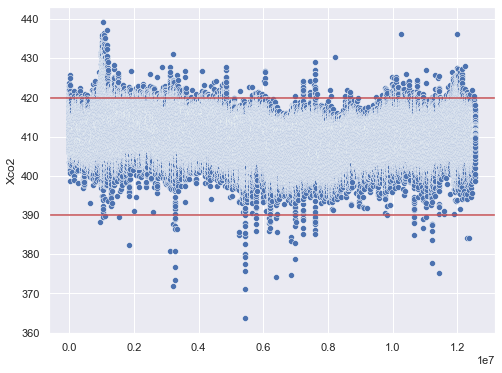

In [34]:
# %%time
# sns.scatterplot(x=np.arange(0, len(df_2020['Month'])), y= df_2020['Xco2'])
# plt.gcf().set_size_inches(8,6)
# plt.axhline(y=420, c='r')
# plt.axhline(y= 390, c='r')
Image(filename='../week_10/scatter_plots_/oco3/2020_OCO3_xco2.png')

In [35]:
df_2020[df_2020["Xco2"] == max(df_2020["Xco2"])]

Xco2   Latitude  Longitude  quality_flag                DateTime  \
30916  439.29108  51.728237  113.89402             0 2020-02-13 05:08:05.010   

       Year  Month  Day  
30916  2020      2   13

# 2020, Xco2 Greater than 419
# Saving the graph as HTML format

In [36]:
xco2_2020_greater_than_max= df_2020[df_2020["Xco2"]  >419]
len(xco2_2020_greater_than_max)

14996

In [37]:
fig= px.scatter_mapbox(df_2020[df_2020["Xco2"]  >420],
                      animation_frame="Month",
                     
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      hover_name="DateTime",
                      zoom=1.25,
                      size_max= 5,
                      #color_continuous_scale=px.colors.cmocean.ice_r,
                      color_continuous_scale=px.colors.sequential.algae,
                      title='OCO- 3\n. Atmospheric Carbon Dioxide Concentration. Year: 2020, (Xco2)> 419'
                      )

# fig.update_layout(
# mapbox_style="carto-positron")

# UPDATE the layout for background-> white
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])


fig.show()

# SAVING the graph
# plotly.offline.plot(fig,
#                    filename= 'C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/OCO3_xco2_higher_419.html',
#                    auto_open= True)

# PROBLEM: processing ENTIRE dataset at the same time


## NOTE: Running the ENTIRE dataset causes error due to LOW Computation POWER

In [38]:
# fig_entire= px.scatter_mapbox(df_xco2_good_quality,
#                               lat="Latitude",
#                               lon= "Longitude",
#                               color= "Xco2",
#                               zoom= 0,
#                               hover_name="DateTime"
# )
# fig_entire.update_layout(
#     mapbox_style= "satellite"
# )
# fig_entire.show()

# NOTE: Handling Big Data

## We can REDUCE The datasets by taking 5th row till end
- ASSUMING less variations between 5 RECORDS each

In [39]:
len(df_xco2_good_quality)

16520069

### LINE plot to reflect the variations of XCO2 within 8 ROWS datasets

<AxesSubplot:ylabel='Xco2'>

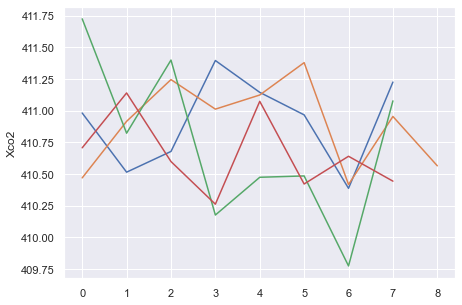

In [40]:
# fig, ax= plt.subplots(1,2)
plt.gcf().set_size_inches(7,5)
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[:8])), y= df_2019["Xco2"].iloc[:8])
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[8:17])), y= df_2019["Xco2"].iloc[8:17])
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[17:25])), y= df_2019["Xco2"].iloc[17:25])
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[25:33])), y= df_2019["Xco2"].iloc[25:33])

In [41]:
df_xco2_good_quality.iloc[::4, :]

Xco2   Latitude   Longitude  quality_flag  \
0       410.98047 -24.961294   80.657340             0   
4       411.14368 -24.862957   80.665050             0   
16      410.46835 -24.929485   80.687386             0   
26      411.12274 -24.824290   80.722130             0   
40      410.56372 -24.818876   80.789536             0   
...           ...        ...         ...           ...   
230101  409.88168 -47.310383 -123.389275             0   
230171  408.21646 -47.430440 -123.079100             0   
230321  409.54200 -48.683254 -118.744660             0   
230356  407.32565 -48.944027 -117.803734             0   
230634  409.71500 -50.454300 -111.249860             0   

                      DateTime  Year  Month  Day  
0      2019-08-06 03:50:04.010  2019      8    6  
4      2019-08-06 03:50:04.050  2019      8    6  
16     2019-08-06 03:50:04.710  2019      8    6  
26     2019-08-06 03:50:05.340  2019      8    6  
40     2019-08-06 03:50:07.010  2019      8    6  
...                        ...   ...    ...  ...  
230101 2020-12-31 23:17:57.050  2020     12   31  
230171 2020-12-31 23:18:00.740  2020     12   31  
230321 2020-12-31 23:18:49.750  2020     12   31  
230356 2020-12-31 23:19:02.050  2020     12   31  
230634 2020-12-31 23:20:22.750  2020     12   31  

[4130018 rows x 8 columns]

################

# BASEMAP: style 'ORHTO' 
- Rotating GLobe has certain parameters to be followed
- REQUIRES: lat_0=0, lon_0=0

## By default, set the LAT and LON 
- Lat_0 -> 10
- Lon_0= 180

# NOTE: Changes on this MAP function
- Color Normalization set to default, no <b>LOG</b> numbers used
- Resolution of the GLOBAL map set to LOWER than 'l' -> crude 'c'


In [181]:
#BASEMAP function
# create a function that creates a BASEMAP
def draw_map_xco2_img( year,day, data, lat_0=0, lon_0=0, x="longiture",y= "latitude", lon_min= -180, lon_max= 180, lat_min= -90, lat_max= 90, size_point= 1, frontier= False):
    
    # Figure setting
    
    plt.figure(figsize= (22, 11), edgecolor='b')

    #PROJECTION for ROBIN requires to state lat_0, and lon_0
    m= Basemap(projection='ortho',
              lat_0= lat_0, lon_0= lon_0,
              resolution='c')
            
    # map style

    # XCO2 VARIATIONS
    #normal= matplotlib.colors.LogNorm(vmin= data['Xco2'].min(), vmax= data['Xco2'].max())
    normal= matplotlib.colors.LogNorm(vmin= 364.183, vmax= 435.6072)
    
    
# LEAVE the NOrm to default
# REQUIRES to pass coordinates using BASEMAP(x,y)
# COLORS: rainbow, turbo
    x, y= m(data['Longitude'].values, data['Latitude'].values)
    m.scatter( x, y, c= data['Xco2'], cmap= plt.cm.rainbow, s=15, #norm= normal,
             marker='D')    #D

    
    # Customizing the COLORBAR
    cbar= plt.colorbar(orientation= "horizontal",
                      format= "%.0f",
                      extend="both",
                      shrink= 0.5,
                      aspect= 15,
                      pad= 0.04)
                      
        
    # MAX and MIN from the TOTAL year of 2019 only
    # LIMIT on the color bAR
    # min and max with linear Space ->5

    
    cbar.set_label(label="XCO2 (parts per million)", size= 35)
    cbar.ax.tick_params(labelsize= 24)
    
    #testing the CBAR
  
    cbar.set_ticks(np.linspace(390, 430, 5))

    plt.clim(390, 430) 
    # BORDER LINES
    m.drawmapboundary(fill_color='black')
    m.drawcoastlines(linewidth= 0.15)
    
    # changing BACKGROUND color
    m.fillcontinents(color='white', alpha= 0.12 )
    #plt.title(str(day), fontsize= 30)
    plt.title('Orbiting Carbon Observatory- 3\nAtmospheric Carbon Dioxide Concentration\nYear: '+str(year)+ ', XCO2 > 419', fontsize =30)
    #title.set_position([.5, .10])
    
    
#     plt.savefig("C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/16_day_cycle_images_BASEMAP/day_"+str(day)+".jpeg",
#                dpi= 200)
    
#    plt.savefig('test.jpeg')

In [182]:
df_2020["Xco2"].describe()

count    1.255528e+07
mean     4.106445e+02
std      2.575777e+00
min      3.636155e+02
25%      4.091987e+02
50%      4.106400e+02
75%      4.122251e+02
max      4.392911e+02
Name: Xco2, dtype: float64

In [183]:
len(xco2_2019_greater_than_max)

2021

# TESTTING
- Below Map represents the data of XCO2 values greater than 419

Wall time: 5.26 s


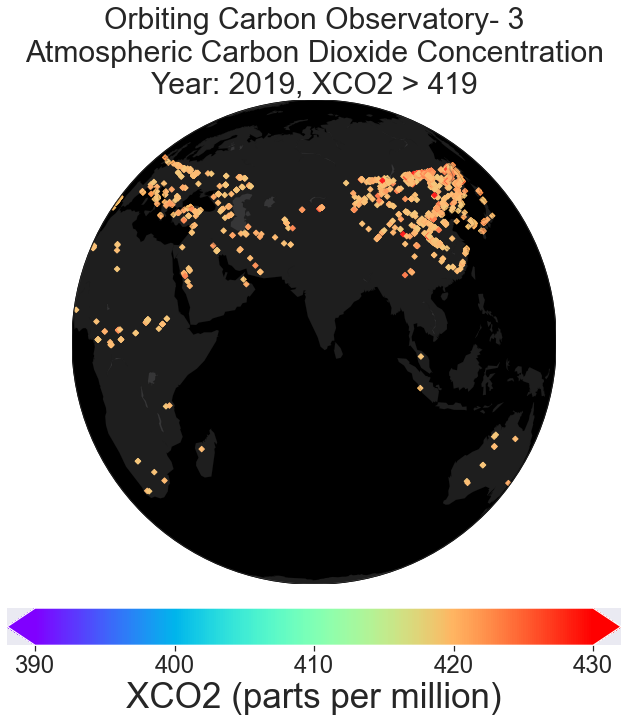

In [184]:
%%time
draw_map_xco2_img("2019","TEST",xco2_2019_greater_than_max, lat_0= 10, lon_0= 75)

In [165]:
# %%time
# draw_map_xco2_img("OCO-3, xco2> 420",xco2_2020_greater_than_max, lat_0= 10, lon_0= 75)

# 16 day cycle

In [50]:
df_2019.head(2)

Xco2   Latitude  Longitude  quality_flag                DateTime  \
0  410.98047 -24.961294   80.65734             0 2019-08-06 03:50:04.010   
1  410.51340 -24.936787   80.65936             0 2019-08-06 03:50:04.020   

   Year  Month  Day  
0  2019      8    6  
1  2019      8    6

# AUG month

In [51]:
aug_2019= df_2019[df_2019["Month"] == 8]

# MAX and MIN of 2019

In [52]:
min(df_2019["Xco2"]), max(df_2019["Xco2"])

(364.183, 435.6072)

In [53]:
first_16_days= np.arange(1, 17)
first_16_days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

# FIRST 16 day cycle of 2019
## OCO-3
### TESTING:
- Selecting the RECORDS that falls on first 15 day period only

Wall time: 2.7 s


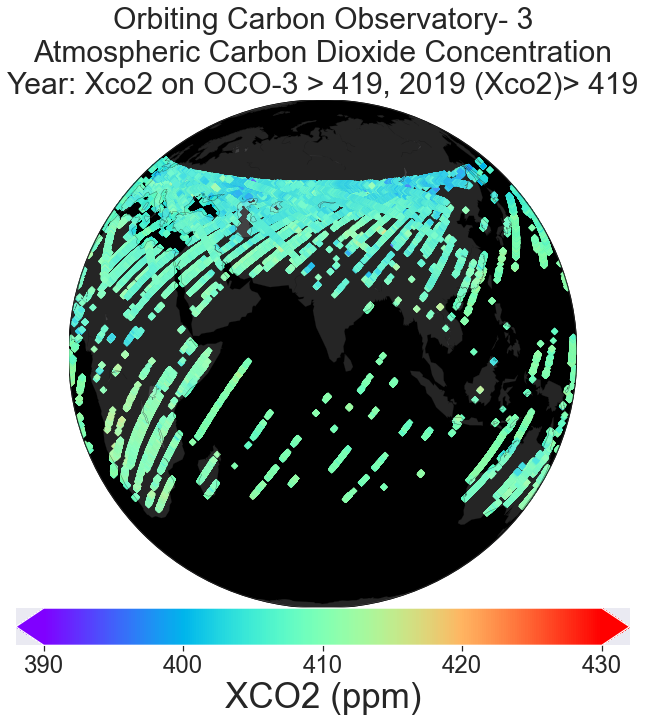

In [54]:
%%time
draw_map_xco2_img("Xco2 on OCO-3 > 419, 2019","TEST-2",aug_2019[aug_2019["Day"].isin(first_16_days)], lat_0= 10, lon_0= 75)

# ENTIRE dataset for OCO-3

## FOR rotation of the globe
- We can use NUMPY linear space
- Linear Space creates the range of NUMPY array based on the INITIAL point, END point, and third param for the lenght

In [174]:
x_val= [-10. , 10.]
y_val= [-180. , 180]

r_steps= 160

# Linear steps for Globe to ROTATE
lat_s= np.linspace(x_val[0], x_val[1], r_steps)
lon_s= np.linspace(y_val[0], y_val[1], r_steps)

# Creating a ORHTO map, XCO2 > 419, OCO-3, 2020
- 2020 year has greater number of datapoints higher than 420 than in 2019
- UNcomment the CODE below. This generates the code upto the number of 'r_steps' declared

In [1]:
# rotation= 0

# for j in range(0, r_steps):
    
    
#     draw_map_xco2_img("2020",str(j), xco2_2020_greater_than_max,
#                       lat_0= lat_s[rotation], lon_0= lon_s[rotation])
    
#     # rotate the globe
#     rotation +=1


# Creating a GIF
- EVERY files that has been generated above will be stored numerically starting from 1
- We can combine the files that will create an animation GIF file

In [188]:
# full_cycle_frames=[]


# # DOUBLE check the RANGE of the datasets
# days_full= np.arange(0, 160)

# # looping over the IMGAES 
# for j in days_full:
#     day_one= plw.Image.open('C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/16_day_cycle_images_BASEMAP/day_'+str(j)+ '.jpeg')
#     full_cycle_frames.append(day_one)
    

# # Creating a GIF
# # Customize DURATION for speed of rotation

# full_cycle_frames[0].save('2020_black_OCO-3_xco2_Max_Ortho.gif', format= 'GIF',
#                     append_images= full_cycle_frames[1:],
#                     save_all= True, duration= 250,
#                     fps=2,
#                     loop= 0)

In [61]:
# # DISPLAYING up the date and month in animation
# year_2019_month= []
# year_2020_month= []

# years= ['2019', '2020']
# months= ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# for i in range(0, 2):
    
#     for k in range(0, 12):
#         print(years[i],'/',months[k])
#         year_2019_month